In [1]:
%%capture
!pip install ipython-autotime

%load_ext autotime

In [2]:
import warnings
warnings.filterwarnings('ignore')

time: 1.42 ms


## Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

time: 2.1 s


## Import Data

In [4]:
train_df = pd.read_csv('https://raw.githubusercontent.com/karinlouw/classification/master/Data/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/karinlouw/classification/master/Data/test.csv')

time: 2.66 s


In [5]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/karinlouw/classification/master/Data/sample_submission.csv')

time: 413 ms


## View Data

In [6]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


time: 100 ms


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
time: 486 ms


In [8]:
train_df['tweetid'].nunique()

15819

time: 6.88 ms


In [9]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


time: 16.4 ms


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
time: 11.1 ms


# Sentiment descriptions

![alt text](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F8e4d65f2029797e0462b52022451829c%2Fdata.PNG?generation=1590752860255531&alt=media)

## Preprocessing

In [11]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

time: 11.1 ms


In [12]:
blanks = []  # start with an empty list

for ind,sent,mess,tid in train_df.itertuples():  # iterate over the DataFrame
    if type(mess)==str:            # avoid NaN values
        if mess.isspace():         # test 'review' for whitespace
            blanks.append(ind)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []
time: 60.2 ms


In [13]:
print(train_df['sentiment'].value_counts())

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64
time: 6.35 ms


In [14]:
#Combine dfs
combine_df = train_df.append(test_df, ignore_index = True, sort = False)
combine_df.head()

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


time: 21.7 ms


In [15]:
#Character count
combine_df['original_char_count'] = combine_df['message'].str.len()
combine_df.head()

,sentiment,message,tweetid,original_char_count
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122


time: 59.5 ms


In [16]:
#Word count
combine_df['original_word_count'] = combine_df['message'].str.split().str.len()
combine_df.head()


,sentiment,message,tweetid,original_char_count,original_word_count
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18


time: 345 ms


In [17]:
# function to collect hashtags
import re

def hashtag_column(x):
    hashtags = []
    new_tag_list = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)          
    
    for tag in hashtags:
        if tag == []:
            tag = np.nan
        new_tag_list.append(tag)
        
    return new_tag_list

combine_df['hashtags'] = hashtag_column(combine_df['message'])
combine_df.head(12)

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker]
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight]
5,1.0,Worth a read whether you do or don't believe i...,425577,110,14,NaN
6,1.0,RT @thenation: Mike Pence doesn’t believe in g...,294933,119,16,NaN
7,1.0,RT @makeandmendlife: Six big things we can ALL...,992717,152,23,NaN
8,1.0,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,139,25,NaN
9,1.0,RT @paigetweedy: no offense… but like… how do ...,260471,88,15,NaN


time: 156 ms


## Base model

In [18]:
base_train_df = combine_df[:15819]
base_test_df = combine_df[15819:]

print('Original train: ', train_df.shape)
print('New train: ', base_train_df.shape)

print('Original test: ', test_df.shape)
print('New test: ', base_test_df.shape)

Original train:  (15819, 3)
New train:  (15819, 6)
Original test:  (10546, 2)
New test:  (10546, 6)
time: 12.5 ms


In [20]:
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import TfidfVectorizer

data = base_train_df.drop(['sentiment','tweetid', 'hashtags'], axis=1)

mapper = DataFrameMapper([
     ('message', TfidfVectorizer()),
     ('original_char_count', None),
     ('original_word_count', None),
 ])

X = mapper.fit_transform(data)
y = base_train_df['sentiment']

time: 2.81 s


In [21]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# Scale data
X_scaled = scaler.fit_transform(X)

time: 18.3 s


In [22]:
'''Classifiers'''
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

time: 276 ms


In [23]:
#Preliminary model evaluation using default parameters

#Creating a dict of the models
model_dict = {'LogisticRegression' : LogisticRegression(multi_class='ovr'),
              'LinearSVC' : LinearSVC(),
              'Multinomial Naive Bayes': MultinomialNB(),
             }

#Train test split with stratified sampling for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size = 0.2,  
                                                    random_state = 27)

#Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='weighted'))
        r_score_list.append(recall_score(y_test, y_pred, average='weighted'))
        f1_score_list.append(f1_score(y_test, y_pred, average='weighted'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'weighted_f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='weighted_f1_score', ascending=False)
    return model_comparison_df

model_scores = model_score_df(model_dict)
model_scores

,model_name,accuracy_score,precision_score,recall_score,weighted_f1_score
1,LinearSVC,0.742415,0.734551,0.742415,0.736632
0,LogisticRegression,0.743363,0.735427,0.743363,0.728889
2,Multinomial Naive Bayes,0.702908,0.700631,0.702908,0.652193


time: 3min 17s


## Preprocessing continued

In [24]:
#Replace URLs with url-web
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
combine_df['clean_tweet'] = combine_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

time: 245 ms


In [25]:
# #Converting HTML entities
# from html.parser import HTMLParser
# html_parser = HTMLParser()

# combine_df['clean_tweet'] = combine_df['message'].apply(lambda x: html_parser.unescape(x))
# combine_df['clean_tweet']

time: 722 µs


In [26]:
#Remove mentions
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# remove twitter handles (@user)
combine_df['clean_tweet'] = np.vectorize(remove_pattern)(combine_df['clean_tweet'], "@[\w]*")
combine_df['clean_tweet']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT : Researchers say we have three years to ac...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT : It's 2016, and a racist, sexist, climate ...
                               ...                        
26360    RT : Brb, writing a poem about climate change....
26361    2016: the year climate change came home: Durin...
26362    RT : Pacific countries positive about Fiji lea...
26363    RT : You’re so hot, you must be the cause for ...
26364    RT : climate change is a global issue that's o...
Name: clean_tweet, Length: 26365, dtype: object

time: 2.22 s


In [27]:
#Lowercase
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: x.lower())
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief doesn't think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it's not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,rt : researchers say we have three years to ac...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],#todayinmaker# wired : 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],"rt : it's 2016, and a racist, sexist, climate ..."


time: 47.7 ms


In [28]:
#Contraction lookup
# ApostContractionrophe Dictionary
contraction_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "I would",
  "i'd've": "I would have",
  "i'll": "I will",
  "i'll've": "I will have",
  "i'm": "I am",
  "i've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

time: 225 ms


In [29]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x,contraction_dict))
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,rt : researchers say we have three years to ac...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],#todayinmaker# wired : 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],"rt : it is 2016, and a racist, sexist, climate..."


time: 309 ms


In [30]:
#Short word lookup
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rt": "retweet",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

time: 9.72 ms


In [31]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,retweet : researchers say we have three years ...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],#todayinmaker# wired : 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],"retweet : it is 2016, and a racist, sexist, cl..."


time: 330 ms


In [32]:
#Emoji lookup
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

time: 5.13 ms


In [33]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,retweet : researchers say we have three years ...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],#todayinmaker# wired : 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],"retweet : it is 2016, and a racist, sexist, cl..."


time: 294 ms


In [34]:
#Replace punctuation with space
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,retweet researchers say we have three years ...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],todayinmaker wired 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],retweet it is 2016 and a racist sexist cl...


time: 297 ms


In [35]:
#Replace special character with space
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,retweet researchers say we have three years ...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],todayinmaker wired 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],retweet it is 2016 and a racist sexist cl...


time: 373 ms


In [36]:
#Replacing Numbers (integers) with space
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,retweet researchers say we have three years ...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],todayinmaker wired was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],retweet it is and a racist sexist cl...


time: 307 ms


In [37]:
#Remove words with length equal to 1

combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
combine_df['clean_tweet'][0:5]

0    polyscimajor epa chief does not think carbon d...
1    it is not like we lack evidence of anthropogen...
2    retweet researchers say we have three years to...
3    todayinmaker wired was pivotal year in the war...
4    retweet it is and racist sexist climate change...
Name: clean_tweet, dtype: object

time: 209 ms


In [38]:
# #Spelling correction
# from textblob import TextBlob

# combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: str(TextBlob(x).correct()))
# combine_df['clean_tweet']

time: 885 µs


In [39]:
# from google.colab import files

# combine_df.to_csv('SpellCheckTweets.csv', index=False)
# files.download('SpellCheckTweets.csv')

time: 684 µs


In [40]:
# combine_df = pd.read_csv('SpellCheckTweets.csv')
# combine_df.shape

time: 618 µs


In [41]:
# Tokenize
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt', quiet=True)

# Creating token for the clean tweets
combine_df['tweet_token'] = combine_df['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
combine_df.head()

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet,tweet_token
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...,"[polyscimajor, epa, chief, does, not, think, c..."
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...,"[it, is, not, like, we, lack, evidence, of, an..."
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,140,19,NaN,retweet researchers say we have three years to...,"[retweet, researchers, say, we, have, three, y..."
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,[TodayinMaker],todayinmaker wired was pivotal year in the war...,"[todayinmaker, wired, was, pivotal, year, in, ..."
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,[ElectionNight],retweet it is and racist sexist climate change...,"[retweet, it, is, and, racist, sexist, climate..."


time: 8.13 s


In [42]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

stop_words = nltk.corpus.stopwords.words('english')
# set(stop_words)

time: 22.7 ms


In [43]:
# Created new columns of tokens - stop words removed
combine_df['tweet_token_filtered'] = combine_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
combine_df[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, think, carbon, diox..."
1,"[it, is, not, like, we, lack, evidence, of, an...","[like, lack, evidence, anthropogenic, global, ..."
2,"[retweet, researchers, say, we, have, three, y...","[retweet, researchers, say, three, years, act,..."
3,"[todayinmaker, wired, was, pivotal, year, in, ...","[todayinmaker, wired, pivotal, year, war, clim..."
4,"[retweet, it, is, and, racist, sexist, climate...","[retweet, racist, sexist, climate, change, den..."
5,"[worth, read, whether, you, do, or, do, not, b...","[worth, read, whether, believe, climate, chang..."
6,"[retweet, mike, pence, doesn, believe, in, glo...","[retweet, mike, pence, believe, global, warmin..."
7,"[retweet, six, big, things, we, can, all, do, ...","[retweet, six, big, things, today, fight, clim..."
8,"[my, yo, nephew, is, inconsolable, he, wants, ...","[yo, nephew, inconsolable, wants, die, old, ag..."
9,"[retweet, no, offense, but, like, how, do, you...","[retweet, offense, like, believe, global, warm..."


time: 1.44 s


In [44]:
#Stemming - Stop words removed
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# Created one more columns tweet_stemmed it shows tweets' stemmed version
combine_df['tweet_stemmed_filtered'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
combine_df['tweet_stemmed_filtered'].head(10)

0    polyscimajor epa chief think carbon dioxid mai...
1               like lack evid anthropogen global warm
2    retweet research say three year act climat cha...
3    todayinmak wire pivot year war climat chang ur...
4    retweet racist sexist climat chang deni bigot ...
5    worth read whether believ climat chang url web...
6    retweet mike penc believ global warm smoke cau...
7    retweet six big thing today fight climat chang...
8    yo nephew inconsol want die old age like peris...
9               retweet offens like believ global warm
Name: tweet_stemmed_filtered, dtype: object

time: 12.3 s


In [45]:
#Lemmatization - Stop words removed
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

combine_df['tweet_lemmatized_filtered'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
combine_df['tweet_lemmatized_filtered'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    retweet researcher say three year act climate ...
3    todayinmaker wired pivotal year war climate ch...
4    retweet racist sexist climate change denying b...
5    worth read whether believe climate change url ...
6    retweet mike penny believe global warming smok...
7    retweet six big thing today fight climate chan...
8    yo nephew inconsolable want die old age like p...
9          retweet offense like believe global warming
Name: tweet_lemmatized_filtered, dtype: object

time: 7.38 s


In [46]:
#Stemming - Stop words not removed
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# Created one more columns tweet_stemmed it shows tweets' stemmed version
combine_df['tweet_stemmed'] = combine_df['tweet_token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
combine_df['tweet_stemmed'].head(10)

0    polyscimajor epa chief doe not think carbon di...
1    it is not like we lack evid of anthropogen glo...
2    retweet research say we have three year to act...
3    todayinmak wire wa pivot year in the war on cl...
4    retweet it is and racist sexist climat chang d...
5    worth read whether you do or do not believ in ...
6    retweet mike penc doesn believ in global warm ...
7    retweet six big thing we can all do today to f...
8    my yo nephew is inconsol he want to die of old...
9    retweet no offens but like how do you just not...
Name: tweet_stemmed, dtype: object

time: 15.8 s


In [47]:
#Lemmatization - Stop words not removed
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

combine_df['tweet_lemmatized'] = combine_df['tweet_token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
combine_df['tweet_lemmatized'].head(10)

0    polyscimajor epa chief doe not think carbon di...
1    it is not like we lack evidence of anthropogen...
2    retweet researcher say we have three year to a...
3    todayinmaker wired wa pivotal year in the war ...
4    retweet it is and racist sexist climate change...
5    worth read whether you do or do not believe in...
6    retweet mike penny doesn believe in global war...
7    retweet six big thing we can all do today to f...
8    my yo nephew is inconsolable he want to die of...
9    retweet no offense but like how do you just no...
Name: tweet_lemmatized, dtype: object

time: 3.65 s


## Insights and visuals

Most frequent words

In [48]:
from collections import Counter

def word_freq(clean_text_list, top_n):
    """
    Word Frequency
    """
    flat = [item for sublist in clean_text_list for item in sublist]
    with_counts = Counter(flat)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

counter_text_list = [i.split() for i in combine_df['tweet_lemmatized_filtered']]

wf = word_freq(counter_text_list, 20)
wf.head(20)

,0,1
0,climate,21736
1,change,21282
2,web,16299
3,url,16207
4,retweet,16106
5,global,6355
6,warming,5925
7,trump,4094
8,believe,1938
9,amp,1555


time: 230 ms


Average word and character count by category

In [49]:
#Avg word count by category
def word_count(text):
    return len(str(text).split(' '))

combine_df['word_count'] = combine_df['tweet_lemmatized_filtered'].apply(word_count)
avg_wc = combine_df.groupby('sentiment').mean().reset_index()
avg_wc[['sentiment','word_count']]

,sentiment,word_count
0,-1.0,11.422840
1,0.0,10.334892
2,1.0,11.780188
3,2.0,12.276923


time: 121 ms


In [50]:
def character_count(text):
    return len(str(text))

combine_df['character_count'] = combine_df['tweet_lemmatized_filtered'].apply(character_count)
avg_cc = combine_df.groupby('sentiment').mean().reset_index()
avg_cc[['sentiment','character_count']]

,sentiment,character_count
0,-1.0,76.003086
1,0.0,68.592010
2,1.0,80.092849
3,2.0,79.773352


time: 81.6 ms


Word Clouds

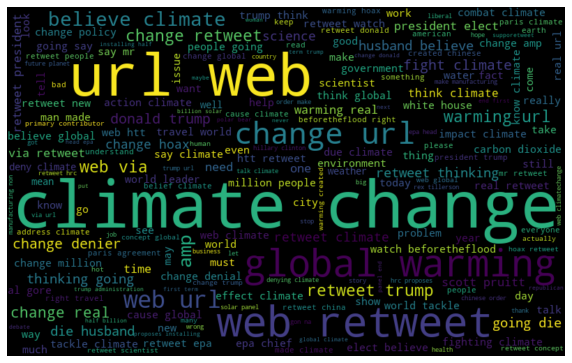

time: 4.57 s


In [51]:
all_words = ' '.join([text for text in combine_df['tweet_lemmatized_filtered']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

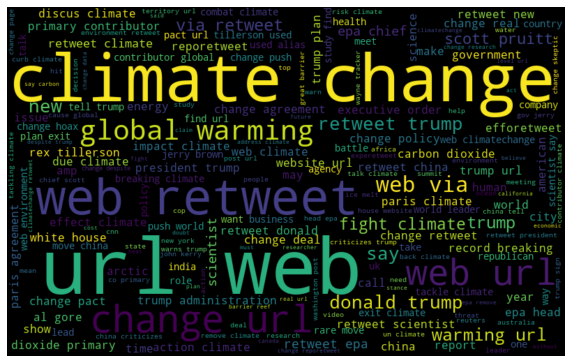

time: 2.17 s


In [52]:
# Word clouds - news
all_words = ' '.join([text for text in combine_df['tweet_lemmatized_filtered'][combine_df['sentiment']==2]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

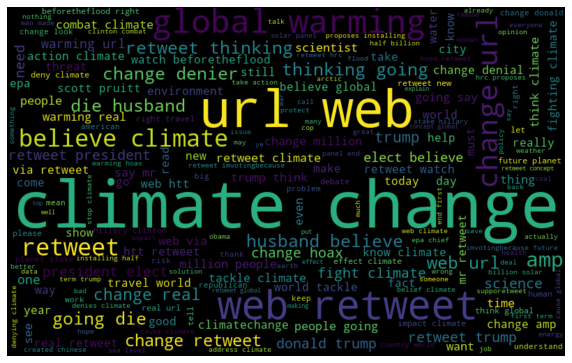

time: 2.67 s


In [53]:
# Word clouds - pro
all_words = ' '.join([text for text in combine_df['tweet_lemmatized_filtered'][combine_df['sentiment']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

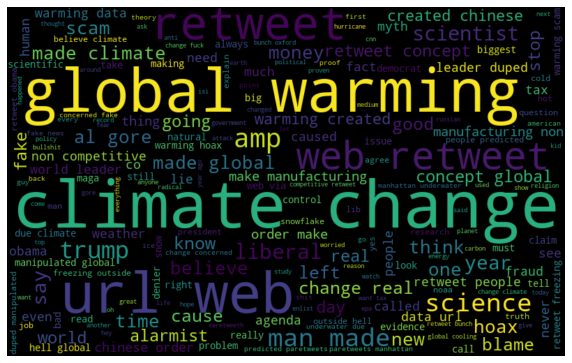

time: 1.84 s


In [54]:
# Word clouds - anti
all_words = ' '.join([text for text in combine_df['tweet_lemmatized_filtered'][combine_df['sentiment']==-1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Hashtag frequency per category

In [55]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

time: 1.14 ms


In [56]:
# extracting hashtags news related tweets
HT_news = hashtag_extract(train_df['message'][train_df['sentiment'] == 2])

# extracting hashtags from pro climate change tweets
HT_pro = hashtag_extract(train_df['message'][train_df['sentiment'] == 1])

# extracting hashtags from anti climate change tweets
HT_anti = hashtag_extract(train_df['message'][train_df['sentiment'] == -1])


# unnesting list
HT_news = sum(HT_news,[])
HT_pro = sum(HT_pro,[])
HT_anti = sum(HT_anti,[])

time: 403 ms


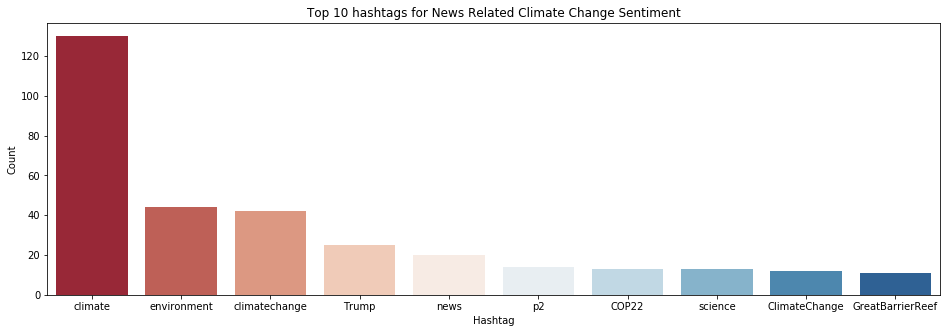

time: 1.33 s


In [57]:
import seaborn as sns

#News related tweets Hashtags
a = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette='RdBu')
ax.set(ylabel = 'Count')
plt.title('Top 10 hashtags for News Related Climate Change Sentiment')
plt.show()

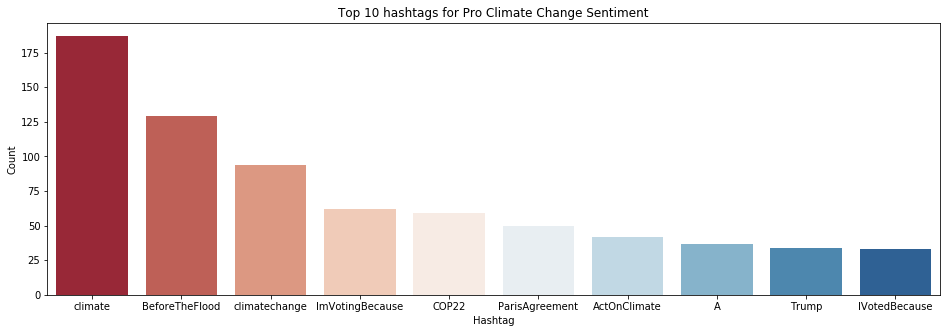

time: 486 ms


In [58]:
#Pro climate change tweets Hashtags
a = nltk.FreqDist(HT_pro)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette='RdBu')
ax.set(ylabel = 'Count')
plt.title('Top 10 hashtags for Pro Climate Change Sentiment')
plt.show()

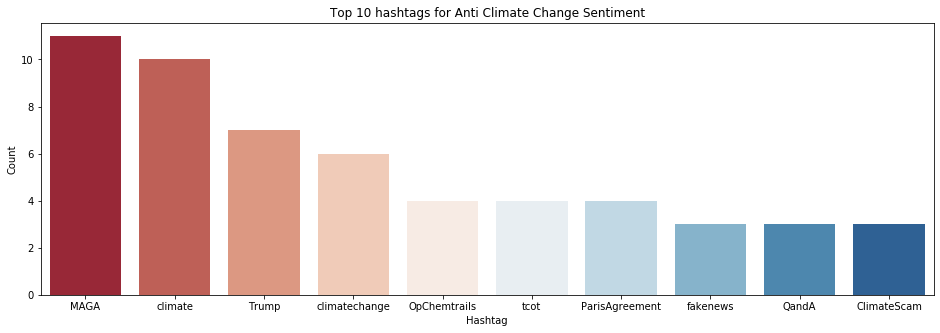

time: 673 ms


In [59]:
#Anti climate change tweets Hashtags
a = nltk.FreqDist(HT_anti)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette='RdBu')
ax.set(ylabel = 'Count')
plt.title('Top 10 hashtags for Anti Climate Change Sentiment')
plt.show()

## Prepare data for modelling

In [60]:
#Stitch list of words back together for vectorizing

import warnings
warnings.filterwarnings('ignore')

combine_df['tweet_token'] = combine_df['tweet_token'].apply(lambda x: ' '.join(w for w in x))
combine_df['tweet_token_filtered'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join(w for w in x))

combine_df.head(2)


,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed_filtered,tweet_lemmatized_filtered,tweet_stemmed,tweet_lemmatized,word_count,character_count
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,polyscimajor epa chief think carbon dioxide ma...,polyscimajor epa chief think carbon dioxid mai...,polyscimajor epa chief think carbon dioxide ma...,polyscimajor epa chief doe not think carbon di...,polyscimajor epa chief doe not think carbon di...,14,86
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...,it is not like we lack evidence of anthropogen...,like lack evidence anthropogenic global warming,like lack evid anthropogen global warm,like lack evidence anthropogenic global warming,it is not like we lack evid of anthropogen glo...,it is not like we lack evidence of anthropogen...,6,47


time: 324 ms


Split combine_df to original df's

In [61]:
new_train_df = combine_df[:15819]
new_test_df = combine_df[15819:]

print('Original train: ', train_df.shape)
print('New train: ', new_train_df.shape)

print('Original test: ', test_df.shape)
print('New test: ', new_test_df.shape)


Original train:  (15819, 3)
New train:  (15819, 15)
Original test:  (10546, 2)
New test:  (10546, 15)
time: 5.95 ms


In [62]:
new_train_df.head(2)

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed_filtered,tweet_lemmatized_filtered,tweet_stemmed,tweet_lemmatized,word_count,character_count
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,polyscimajor epa chief think carbon dioxide ma...,polyscimajor epa chief think carbon dioxid mai...,polyscimajor epa chief think carbon dioxide ma...,polyscimajor epa chief doe not think carbon di...,polyscimajor epa chief doe not think carbon di...,14,86
1,1.0,It's not like we lack evidence of anthropogeni...,126103,62,10,NaN,it is not like we lack evidence of anthropogen...,it is not like we lack evidence of anthropogen...,like lack evidence anthropogenic global warming,like lack evid anthropogen global warm,like lack evidence anthropogenic global warming,it is not like we lack evid of anthropogen glo...,it is not like we lack evidence of anthropogen...,6,47


time: 120 ms


In [63]:
new_train_df.columns

Index(['sentiment', 'message', 'tweetid', 'original_char_count',
       'original_word_count', 'hashtags', 'clean_tweet', 'tweet_token',
       'tweet_token_filtered', 'tweet_stemmed_filtered',
       'tweet_lemmatized_filtered', 'tweet_stemmed', 'tweet_lemmatized',
       'word_count', 'character_count'],
      dtype='object')

time: 4.21 ms


In [64]:
new_train_df.head(1)

,sentiment,message,tweetid,original_char_count,original_word_count,hashtags,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed_filtered,tweet_lemmatized_filtered,tweet_stemmed,tweet_lemmatized,word_count,character_count
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,NaN,polyscimajor epa chief does not think carbon d...,polyscimajor epa chief does not think carbon d...,polyscimajor epa chief think carbon dioxide ma...,polyscimajor epa chief think carbon dioxid mai...,polyscimajor epa chief think carbon dioxide ma...,polyscimajor epa chief doe not think carbon di...,polyscimajor epa chief doe not think carbon di...,14,86


time: 29.8 ms


In [65]:
#Lemmatized tweet with stop words not removed
feature_df = new_train_df.filter(['sentiment','tweet_lemmatized', 'word_count', 'character_count'], axis=1)
feature_df.head()


,sentiment,tweet_lemmatized,word_count,character_count
0,1.0,polyscimajor epa chief doe not think carbon di...,14,86
1,1.0,it is not like we lack evidence of anthropogen...,6,47
2,2.0,retweet researcher say we have three year to a...,13,73
3,1.0,todayinmaker wired wa pivotal year in the war ...,9,58
4,1.0,retweet it is and racist sexist climate change...,10,77


time: 19.3 ms


In [66]:
#Vectorize text and keep addtional features with DataFrameMapper

data = feature_df

mapper = DataFrameMapper([
     ('tweet_lemmatized', TfidfVectorizer()),
     ('word_count', None),
     ('character_count', None),
 ])

X = mapper.fit_transform(data)
y = y = base_train_df['sentiment']

time: 2.33 s


Reduce the number of features using TruncatedSVD

In [67]:
#Dimension reduction. Only usee 100 best features:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, 
                   n_iter=10, 
                   random_state=3)

X = svd.fit_transform(X)
X.shape

(15819, 100)

time: 1min 18s


In [68]:
var_explained = svd.explained_variance_ratio_.sum()
var_explained

0.998061004111187

time: 5.39 ms


In [69]:
# Import the scaler module
scaler = preprocessing.MinMaxScaler()

# Scale data
X_scaled = scaler.fit_transform(X)
X.shape

(15819, 100)

time: 3.44 s


In [70]:
#Split data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


time: 169 ms


## Model Training

Run models individually then in the model_score function to get an idea how long each model takes.
<br>Training models on lemmatized text with stop words not removed

In [71]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.71      0.10      0.17       278
           0       0.57      0.30      0.39       425
           1       0.70      0.86      0.77      1755
           2       0.68      0.72      0.70       706

    accuracy                           0.68      3164
   macro avg       0.66      0.49      0.51      3164
weighted avg       0.68      0.68      0.65      3164

time: 2.45 s


In [72]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       0.00      0.00      0.00       425
           1       0.55      1.00      0.71      1755
           2       0.00      0.00      0.00       706

    accuracy                           0.55      3164
   macro avg       0.14      0.25      0.18      3164
weighted avg       0.31      0.55      0.40      3164

time: 31.8 ms


In [73]:
#Support vector model
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.69      0.06      0.12       278
           0       0.58      0.31      0.40       425
           1       0.70      0.85      0.77      1755
           2       0.67      0.74      0.70       706

    accuracy                           0.69      3164
   macro avg       0.66      0.49      0.50      3164
weighted avg       0.68      0.69      0.65      3164

time: 22.2 s


In [74]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=3)
rf_model.fit(X_train,y_train)

predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       1.00      0.13      0.23       278
           0       0.74      0.27      0.40       425
           1       0.68      0.92      0.78      1755
           2       0.76      0.66      0.71       706

    accuracy                           0.71      3164
   macro avg       0.80      0.50      0.53      3164
weighted avg       0.74      0.71      0.67      3164

time: 20.6 s


In [75]:
#GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=100, max_depth = 2, random_state = 0)
gb_model.fit(X_train,y_train)

predictions = gb_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.47      0.28      0.35       278
           0       0.48      0.38      0.43       425
           1       0.71      0.79      0.75      1755
           2       0.67      0.69      0.68       706

    accuracy                           0.67      3164
   macro avg       0.58      0.53      0.55      3164
weighted avg       0.65      0.67      0.65      3164

time: 3min 8s


In [76]:
#OneVsRest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

ovr_model = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
ovr_model.fit(X_train,y_train)

predictions = ovr_model.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

          -1       0.69      0.06      0.12       278
           0       0.58      0.31      0.40       425
           1       0.70      0.85      0.77      1755
           2       0.67      0.74      0.70       706

    accuracy                           0.69      3164
   macro avg       0.66      0.49      0.50      3164
weighted avg       0.68      0.69      0.65      3164

time: 20.6 s


In [79]:
model_dict_2 = {'LogisticRegression' : LogisticRegression(multi_class='ovr'),
              'Naive Bayes' :MultinomialNB(),
              'LinearSVC' : LinearSVC(),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Gradient Boosting' : GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=100, max_depth = 2),
              'OneVsRestClassifier' : OneVsRestClassifier(LinearSVC(), n_jobs=-1),
             }

time: 2.9 ms


In [80]:
model_scores_2 = model_score_df(model_dict_2)
model_scores_2

,model_name,accuracy_score,precision_score,recall_score,weighted_f1_score
3,Random Forest,0.705436,0.737165,0.705436,0.667099
4,Gradient Boosting,0.666245,0.65162,0.666245,0.655109
0,LogisticRegression,0.684576,0.677647,0.684576,0.650405
2,LinearSVC,0.685525,0.677933,0.685525,0.648567
5,OneVsRestClassifier,0.685525,0.677933,0.685525,0.648567
1,Naive Bayes,0.554678,0.307667,0.554678,0.395796


time: 4min 14s


# Data balancing

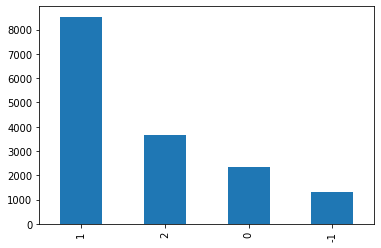

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64
time: 428 ms


In [81]:
train_df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()
print(train_df['sentiment'].value_counts())

# Hyperparameter tuning